Importing libraries and the dataset, I imported pandas and regex

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import re

df = pd.read_csv("/content/python - python.csv")
df.head(20)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,X9283,Sales,Quantity,Discount,Returned,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,CA-2017-152156,43047.0,43050.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.96,2,0,0,NaN,NaN,NaN,NaN,NaN
1,CA-2017-152156,43047.0,43050.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Hon Deluxe Fabric Upholstered Stacking Chairs,Rounded Back,731.94,3,0,0,NaN,NaN,NaN,NaN
2,CA-2017-138688,42898.0,42902.0,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0,0,NaN,NaN,NaN,NaN,NaN
3,US-2016-108966,42654.0,42661.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,0,NaN,NaN,NaN,NaN,NaN
4,US-2016-108966,42654.0,42661.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Eldon Fold 'N Roll Cart System,22.368,2,0.2,0,NaN,NaN,NaN,NaN,NaN
5,CA-2015-115812,42164.0,42169.0,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Eldon Expressions Wood and Plastic Desk Access...,Cherry Wood,48.86,7,0,0,NaN,NaN,NaN,NaN
6,CA-2015-115812,42164.0,42169.0,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Newell 322,7.28,4,0,0,NaN,NaN,NaN,NaN,NaN
7,CA-2015-115812,42164.0,42169.0,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Mitel 5320 IP Phone VoIP phone,907.152,6,0.2,0,NaN,NaN,NaN,NaN,NaN
8,CA-2015-115812,42164.0,42169.0,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,DXL Angle-View Binders with Locking Rings by S...,18.504,3,0.2,0,NaN,NaN,NaN,NaN,NaN
9,CA-2015-115812,42164.0,42169.0,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,...,Belkin F5C206VTEL 6 Outlet Surge,114.9,5,0,0,NaN,NaN,NaN,NaN,NaN


Creted a duplicate of the initial dataframe

In [ ]:
df2 = df.copy()
df2.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,X9283,Sales,Quantity,Discount,Returned,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,CA-2017-152156,43047.0,43050.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.96,2,0,0,NaN,NaN,NaN,NaN,NaN
1,CA-2017-152156,43047.0,43050.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Hon Deluxe Fabric Upholstered Stacking Chairs,Rounded Back,731.94,3,0,0,NaN,NaN,NaN,NaN
2,CA-2017-138688,42898.0,42902.0,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0,0,NaN,NaN,NaN,NaN,NaN
3,US-2016-108966,42654.0,42661.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,0,NaN,NaN,NaN,NaN,NaN
4,US-2016-108966,42654.0,42661.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Eldon Fold 'N Roll Cart System,22.368,2,0.2,0,NaN,NaN,NaN,NaN,NaN


Since I saw that the rows are inconsistent, some were still not separated by comma and some were not in their proper columns, I forced them to go back in one column

In [ ]:
df2['Order ID'] = df2[df2.columns[0:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

In [ ]:
df3 = pd.DataFrame(df2[df2.columns[0]])
df3.head(10)

,Order ID
0,"CA-2017-152156,43047.0,43050.0,Second Class,CG..."
1,"CA-2017-152156,43047.0,43050.0,Second Class,CG..."
2,"CA-2017-138688,42898.0,42902.0,Second Class,DV..."
3,"US-2016-108966,42654.0,42661.0,Standard Class,..."
4,"US-2016-108966,42654.0,42661.0,Standard Class,..."
5,"CA-2015-115812,42164.0,42169.0,Standard Class,..."
6,"CA-2015-115812,42164.0,42169.0,Standard Class,..."
7,"CA-2015-115812,42164.0,42169.0,Standard Class,..."
8,"CA-2015-115812,42164.0,42169.0,Standard Class,..."
9,"CA-2015-115812,42164.0,42169.0,Standard Class,..."


Now we have a dataset with 10,797 rows and condensed in one cell

In [ ]:
df2.shape

(10797, 25)

Since they are all condensed, this is also a good time to drop duplicates because for sure those should be unique by this time

In [ ]:
df3.columns = ['Raw']
df3 = df3.drop_duplicates(keep="first")

In [ ]:
df3

,Raw
0,"CA-2017-152156,43047.0,43050.0,Second Class,CG..."
1,"CA-2017-152156,43047.0,43050.0,Second Class,CG..."
2,"CA-2017-138688,42898.0,42902.0,Second Class,DV..."
3,"US-2016-108966,42654.0,42661.0,Standard Class,..."
4,"US-2016-108966,42654.0,42661.0,Standard Class,..."
...,...
9989,"CA-2015-110422,42025.0,42027.0,Second Class,TB..."
9990,"CA-2018-121258,43157.0,43162.0,Standard Class,..."
9991,"CA-2018-121258,43157.0,43162.0,Standard Class,..."
9992,"CA-2018-121258,43157,43162,Standard Class,DB-1..."


We were able to remove ~800 rows of duplicates

We then prepare the separation of the row entries into their proper columns as named properly, I initially used the normal indexing however because there were null values in the Postal Code, I used Product ID as the basis since it is unique in pattern used regex to select the succeeding data accordingly

In [ ]:
df3['Order ID'] = df3['Raw'].str.split(',').str[0]
df3['Order Date'] = df3['Raw'].str.split(',').str[1]
df3['Ship Date'] = df3['Raw'].str.split(',').str[2]
df3['Ship Mode'] = df3['Raw'].str.split(',').str[3]
df3['Customer ID'] = df3['Raw'].str.split(',').str[4]
df3['Customer Name'] = df3['Raw'].str.split(',').str[5]
df3['Segment'] = df3['Raw'].str.split(',').str[6]
df3['Country'] = df3['Raw'].str.split(',').str[7]
df3['City'] = df3['Raw'].str.split(',').str[8]
df3['State'] = df3['Raw'].str.split(',').str[9]
df3['Postal Code'] = df3['Raw'].str.extract(r'^.+?,.+?,.+?,.+?,.+?,.+?,.+?,.+?,.+?,.+?,(\d+.\d+),.+?,[A-Z]{3}-[A-Z]{2}-\d+,')
df3['Region'] = df3['Raw'].str.extract(r'^.+,(.+?),[A-Z]{3}-[A-Z]{2}-\d+,')
df3['Product ID'] = df3['Raw'].str.extract(r',([A-Z]{3}-[A-Z]{2}-\d+),')
df3['X9281'] = df3['Raw'].str.extract(r',[A-Z]{3}-[A-Z]{2}-\d+,(.+?),')
df3['X9282'] = df3['Raw'].str.extract(r',[A-Z]{3}-[A-Z]{2}-\d+,.+?,(.+?),')
df3['X9283'] = df3['Raw'].str.extract(r'^.+?,.+?,.+?,.+?,.+?,.+?,.+?,.+?,.+?,.+?,.+?,.+?,.+?,.+?,.+?,(.+),.+,.+,.+,.+$')
df3['X9284'] = df3['X9283'].str.split(',').str[1]
df3['X9285'] = df3['X9283'].str.split(',').str[2]
df3['X9283'] = df3['X9283'].str.split(',').str[0] #removing other comma separated values
df3["Sales"] = df3["Raw"].str.extract(r'^.+,([^,]*.+),.+,.+,.+$')
df3["Quantity"] = df3["Raw"].str.extract(r'^.+,([^,]*.+),.+,.+$')
df3["Discount"] = df3["Raw"].str.extract(r'^.+,([^,]*.+),.+$')
df3["Returned"] = df3["Raw"].str.extract(r'^.+,([^,]*.+)$')
df3.head(5)

,Raw,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,X9281,X9282,X9283,X9284,X9285,Sales,Quantity,Discount,Returned
0,"CA-2017-152156,43047.0,43050.0,Second Class,CG...",CA-2017-152156,43047.0,43050.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,NaN,NaN,261.96,2,0,0
1,"CA-2017-152156,43047.0,43050.0,Second Class,CG...",CA-2017-152156,43047.0,43050.0,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs,Rounded Back,NaN,731.94,3,0,0
2,"CA-2017-138688,42898.0,42902.0,Second Class,DV...",CA-2017-138688,42898.0,42902.0,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,NaN,NaN,14.62,2,0,0
3,"US-2016-108966,42654.0,42661.0,Standard Class,...",US-2016-108966,42654.0,42661.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,NaN,NaN,957.5775,5,0.45,0
4,"US-2016-108966,42654.0,42661.0,Standard Class,...",US-2016-108966,42654.0,42661.0,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,NaN,NaN,22.368,2,0.2,0


Created a new dataframe that removed the raw column I initially created

In [ ]:
df4 = df3[df3.columns[1:]]

However when I was trying to visualize, I realized that the data type of the dates are not in date time format... and this is to check

In [ ]:
display(df4.dtypes)

Order ID         object
Order Date       object
Ship Date        object
Ship Mode        object
Customer ID      object
Customer Name    object
Segment          object
Country          object
City             object
State            object
Postal Code      object
Region           object
Product ID       object
X9281            object
X9282            object
X9283            object
X9284            object
X9285            object
Sales            object
Quantity         object
Discount         object
Returned         object
dtype: object

I changed all the important columns to their proper data types, especially the dates

In [ ]:
df4['Order Date'] = df4['Order Date'].astype(str).astype(float).astype(int)
df4['Ship Date'] = df4['Ship Date'].astype(str).astype(float).astype(int)
df4['Postal Code'] = df4['Postal Code'].fillna(0).astype(str).astype(float).astype(int).astype(str)
df4['Sales'] = df4['Sales'].astype(str).astype(float)
df4['Quantity'] = df4['Quantity'].astype(str).astype(float).astype(int)
df4['Discount'] = df4['Discount'].astype(str).astype(float)
df4['Returned'] = df4['Returned'].astype(str).astype(float).astype(int)

Since the dates are in their Excel encoded format, I used 1899-12-30 as origin that changed it to datetime format

In [ ]:
df4['Order Date'] = pd.to_datetime(df4['Order Date'], unit='D', origin='1899-12-30')
df4['Ship Date'] = pd.to_datetime(df4['Ship Date'], unit='D', origin='1899-12-30')
df4.head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,X9281,X9282,X9283,X9284,X9285,Sales,Quantity,Discount,Returned
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,NaN,NaN,261.9600,2,0.00,0
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,FUR-CH-10000454,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs,Rounded Back,NaN,731.9400,3,0.00,0
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,NaN,NaN,14.6200,2,0.00,0
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,NaN,NaN,957.5775,5,0.45,0
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,NaN,NaN,22.3680,2,0.20,0


As required, I computed for the Net Income per transaction

In [ ]:
df4['Net Income'] = df4['Sales'] - (df4['Sales'] / df4['Quantity']) * df4['Returned']

In [ ]:
df4

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,X9281,X9282,X9283,X9284,X9285,Sales,Quantity,Discount,Returned,Net Income
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,NaN,NaN,261.9600,2,0.00,0,261.9600
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs,Rounded Back,NaN,731.9400,3,0.00,0,731.9400
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,NaN,NaN,14.6200,2,0.00,0,14.6200
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,NaN,NaN,957.5775,5,0.45,0,957.5775
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,NaN,NaN,22.3680,2,0.20,0,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2015-110422,2015-01-21,2015-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,...,Furniture,Furnishings,Ultra Door Pull Handle,NaN,NaN,25.2480,3,0.20,0,25.2480
9990,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,NaN,NaN,91.9600,2,0.00,0,91.9600
9991,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,Technology,Phones,Aastra 57i VoIP phone,NaN,NaN,258.5760,2,0.20,0,258.5760
9992,CA-2018-121258,2018-02-26,2018-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,...,Office Supplies,Paper,It's Hot Message Books with Stickers,"2 3/4"" x 5""",NaN,29.6000,4,0.00,0,29.6000


To show the data visualization, we selected only those from the South

In [ ]:
df_south = df4[df4['Region'] == 'South']
df_south

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,X9281,X9282,X9283,X9284,X9285,Sales,Quantity,Discount,Returned,Net Income
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,NaN,NaN,261.9600,2,0.00,0,261.9600
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Furniture,Chairs,Hon Deluxe Fabric Upholstered Stacking Chairs,Rounded Back,NaN,731.9400,3,0.00,0,731.9400
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,NaN,NaN,957.5775,5,0.45,0,957.5775
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,NaN,NaN,22.3680,2,0.20,0,22.3680
12,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,Office Supplies,Paper,Xerox 1967,NaN,NaN,15.5520,3,0.20,0,15.5520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9971,CA-2016-103772,2016-06-28,2016-07-02,Standard Class,MP-17470,Mark Packer,Home Office,United States,Smyrna,Georgia,...,Office Supplies,Art,Boston Model 1800 Electric Pencil Sharpener,Gray,NaN,140.7500,5,0.00,0,140.7500
9980,US-2016-151435,2016-09-06,2016-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,Louisiana,...,Furniture,Tables,KI Adjustable-Height Table,NaN,NaN,85.9800,1,0.00,0,85.9800
9987,CA-2018-163629,2018-11-17,2018-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,...,Technology,Accessories,Logitech G430 Surround Sound Gaming Headset wi...,NaN,NaN,79.9900,1,0.00,0,79.9900
9988,CA-2018-163629,2018-11-17,2018-11-21,Standard Class,RA-19885,Ruben Ausman,Corporate,United States,Athens,Georgia,...,Technology,Phones,Panasonic KX - TS880B Telephone,NaN,NaN,206.1000,5,0.00,1,164.8800


And we come up with a new dataframe of Net Income and Order Date only

In [ ]:
df_south_dated = pd.DataFrame(df_south.groupby(['Order Date'])['Net Income'].sum())
df_south_dated

,Net Income
Order Date,
2015-01-06,4387.660
2015-01-10,54.830
2015-01-13,1833.200
2015-01-15,149.950
2015-01-20,1918.814
...,...
2018-12-23,1454.438
2018-12-24,712.850
2018-12-25,1360.670


And plotted its dynamics accordingly in a line chart to show the trend/volatility. What is interesting is there was an outlier in 2015!

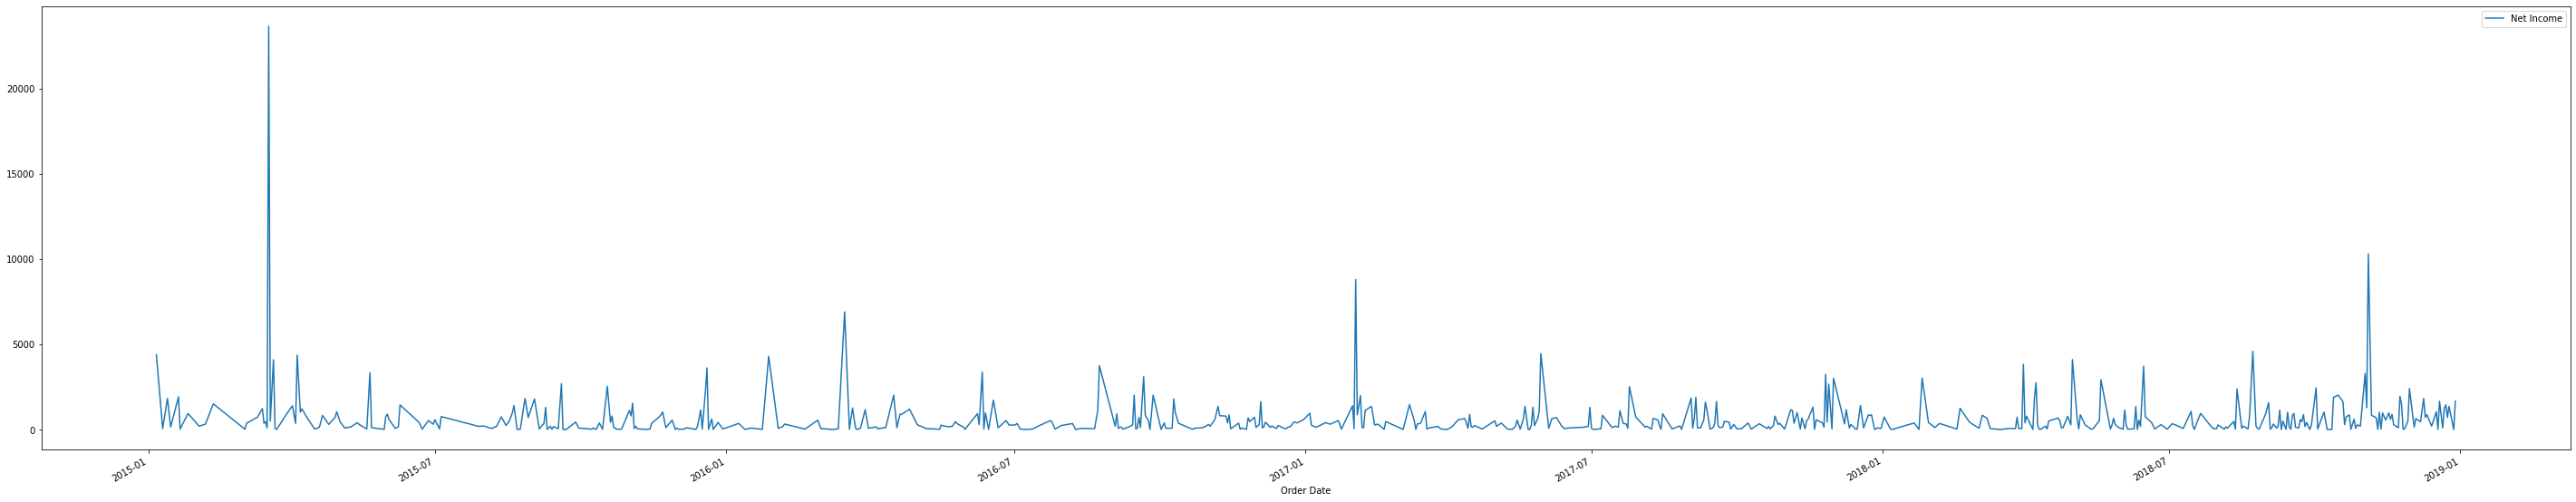

In [ ]:
lines = df_south_dated.plot.line(figsize=(50, 10))